## 1. Generating functions

### (a) Implement a python function that plots the generating function of a given probability mass function in its domain. Write down the generating functions of three random variables corresponding to dice rolls of fair dice with six, ten, and 12 sides respectively. Plot the functions and explain the differences in their shapes.

In [45]:
import warnings

import numpy as np
import pandas as pd
import pathpy as pp
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')
sns.set_style("whitegrid")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
def create_dice_pmf(dice_sides):
    result = np.ones(dice_sides) / dice_sides
    result[0] = 0
    return result

# (x ^ k) * P(k) for space x_values
def calc_gen_func(x_values, dice_pmf):
    dice_gen_func = np.zeros_like(x_values)
    for dice_outcome, probability in enumerate(dice_pmf):
        dice_gen_func += (x_values ** dice_outcome) * probability
    return dice_gen_func

<AxesSubplot:>

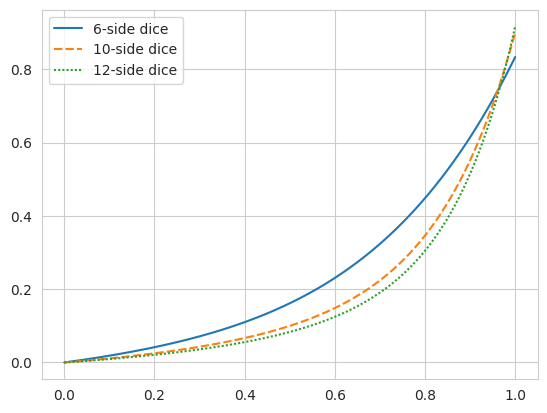

In [47]:
x_values = np.linspace(0,1,1000)

data = {
    f"{dice_size}-side dice": calc_gen_func(x_values, create_dice_pmf(dice_size)) for dice_size in (6, 10, 12)
}
df = pd.DataFrame(data=data, index=x_values)
sns.lineplot(data=df)

The generating function is the polinomial function:

$$G_{0} = \sum_{k = 0}^{\infty} x^{k} P(k)$$

At the same time the dice probability function is uniform, so each side has same probability. So the bigger the number of side on the dice the smaller the coefficient near the same powers of x(for example $\frac{1}{6} x^{2}$, $\frac{1}{10} x^{2}$ and $\frac{1}{12} x^{2}$). Considering that fact that $0 \leq x \leq 1$ each next power is much lower than the previous one. So the more sides the dice has the less value in same point he will have and the closer graph to the right down angle.

### (b) Derive a closed form for a probability generating function $G_{0}$ that generates the probability mass function $P(k) = \frac{1}{2^{k +1}}$, for $k \in N_{0}$.

$$G_{0}(x) = \sum_{k=0}^{\infty} \frac{x^k}{2^{k + 1}} = \frac{1}{2} \sum_{k=0}^{\infty} \left(\frac{x}{2}\right)^{2}$$

It is exactly the geometric progression with $q = \frac{x}{2}$ and $0 \leq x \leq 1$ so $q < 1$. So we will use the formula for the sum of geometric progression with $q < 1$

$$G_{0}(x) = \frac{1}{2} \frac{1}{1 - \frac{x}{2}} = \frac{1}{2 - x}$$

### (c) Consider the following three functions in the domain x ∈ [0, 1] $$G_{1}(x) = e^{x}$$ $$G_{2}(x) = x^{3} - x^{2} + x$$ $$G_{3} = e ^{x - 1}$$
### Which of those functions generate a probability mass function $P(X = k)$ for a discrete random variable $X$ assuming values in $N_{0}$. Proof your answers and give the probability mass function if possible.

The main properties of generating functions:
$$G_{0}(1) = 1$$ and $$\left[ \frac{1}{k!} \frac{d^{k}}{dx^{k}} G_{0} \right]_{x=0} = P(k)$$

So let`s use them for defining are these functions generating functions or not.

1. $$G_1(1) = e \neq 1$$ which means that the function is not generating function
2. $$G_2(1) = 1 - 1 + 1 = 1$$ but at the same time:
$$\left[ \frac{1}{2!} \frac{d^2 G_2(x)}{dx^2}\right]_{x=0} = \left[ \frac{6x - 2}{2} \right]_{x=0} = -1$$ which means that the function can not be the generating function
3. $$G_{3}(1) = e^{1 - 1} = 1$$ and $$\left[ \frac{1}{2!} \frac{d^2 G_2(x)}{dx^2}\right]_{x=0} = \frac{e^{-1}}{k!}$$ So here is the generating function.

## 2. Generating functions and Molloy-Reed Model

### (a) Consider a network with Poisson degree distribution $P(k)$ with mean degree $\lambda$. Write down the corresponding probability generating function of P (k). Simplify the function as much as possible.

$$G_0(x)=\sum\limits_{k=0}^{\infty}\frac{e^{-\lambda}\lambda^k}{k!}x^k = e^{-\lambda} \sum_{k=0}^{\infty} \frac{(\lambda x)^ {k}}{k!}$$

We will use the Teylor-Macloren formula.

$$G_{0}(x) = e^{-\lambda} e^{\lambda x} = e ^ {\lambda(x - 1)}$$


### (b) Consider a random microstate generated by the Molloy-Reed Model with an arbitrary fixed degree distribution P (k). Further consider a probability mass function Q(k) for the excess degree distribution calculated in Task 1(c) of Exercise Sheet 04. Write down the probability generating function corresponding to Q(k). Use the properties of generating functions introduced in Lecture 5 to obtain an expression for the expected excess degree in a random microstate in the Molloy-Reed ensemble with given degree distribution P (k).

Lets use that fact that the probability mass function for the excess distribution:
$$Q(k) = \frac{(k + 1)P(k + 1)}{\langle k \rangle}$$

So the generation function for the excess degree distribution:
$$
G_{Q} = \sum_{k=0}^{\infty}\left(\frac{\left(k+1\right)P(k+1)}{\left<k\right>}\right)x^k = \\
\sum_{k=1}^{\infty} \frac{kP(k)x^{k-1}}{\left< k \right>} = \\
\frac{\sum_{k=1}^{\infty} kP(k)x^{k-1}}{\left< k \right>} = \\
\frac{G_P'(x)}{G_P'(1)}
$$



We can use the formula for calculating the average degree:
$$
\left[ (x\frac{d}{dx}) \frac{G_P'(x)}{G_P'(1)} \right] = \\
\left[\frac{xG_P^{(2)}(x)}{G_P'(1)}\right]_{x=1}= \\
\frac{G_P^{(2)}(1)}{G_P'(1)}
$$